### `Telecommunication Case Study:`

**Import the required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### 1.Load the Data

In [2]:
data = pd.read_csv(r"C:\Users\mythi\Downloads\churn_dataset.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Data Cleaning**

In [6]:
data['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [7]:
data['TotalCharges']=data['TotalCharges'].str.replace(" ",str(np.nan))

In [8]:
data['TotalCharges'].value_counts()

nan       11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [9]:
data['TotalCharges']=data['TotalCharges'].replace('nan',data['TotalCharges'].median())

In [10]:
data['TotalCharges'].isnull().sum()

0

In [11]:
data.TotalCharges = data.TotalCharges.astype(float)

In [12]:
data.SeniorCitizen = data.SeniorCitizen.astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
data.drop('customerID',axis=1,inplace=True)

In [14]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [15]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Machine Learning Problem
**Build a system which can take features  about a customer like Gender, SeniorCitizen, Partner, Dependents etc.. ,
`predict if the customer will churn or not`.**

In [16]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
data=data[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2. Identify the Target Variable and Splitting the Data into Train and Test

Type-`Supervised`

Task-`Classification`

Target variable-`Churn`

In [18]:
y=data['Churn']
X=data[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [20]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6630,Male,1,No,No,16,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,78.75,1218.25
7013,Female,0,No,No,40,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),93.40,3756.40
2224,Male,1,Yes,No,17,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,76.45,1233.40
6580,Female,0,Yes,Yes,49,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.00,3824.20
1501,Male,0,No,No,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.95,243.65


In [21]:
print(X_train.shape,y_train.shape)

print(X_test.shape,y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


### 3. Separating Categorical and Numerical Columns:

In [22]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6630,Male,1,No,No,16,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,78.75,1218.25
7013,Female,0,No,No,40,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),93.40,3756.40
2224,Male,1,Yes,No,17,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,76.45,1233.40
6580,Female,0,Yes,Yes,49,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.00,3824.20
1501,Male,0,No,No,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.95,243.65


In [23]:
X_train.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [24]:
X_train_cat=X_train.select_dtypes(include=['object'])
X_train_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6630,Male,1,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
7013,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic)
2224,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
6580,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic)
1501,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [25]:
X_train_num=X_train.select_dtypes(include=['int64','float64'])
X_train_num.head()

,tenure,MonthlyCharges,TotalCharges
6630,16,78.75,1218.25
7013,40,93.40,3756.40
2224,17,76.45,1233.40
6580,49,78.00,3824.20
1501,13,19.95,243.65


### 4. Scaling the Numerical Features

In [26]:
X_train_num.head()

,tenure,MonthlyCharges,TotalCharges
6630,16,78.75,1218.25
7013,40,93.40,3756.40
2224,17,76.45,1233.40
6580,49,78.00,3824.20
1501,13,19.95,243.65


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)
X_train_num_rescaled.head()

,tenure,MonthlyCharges,TotalCharges
6630,-0.669552,0.471732,-0.471643
7013,0.305416,0.957819,0.649818
2224,-0.628928,0.395418,-0.464949
6580,0.671028,0.446847,0.679775
1501,-0.791422,-1.479251,-0.902262


In [28]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [  32.48182507   64.53262969 2285.6977092 ]
Std of each column: [  24.61621647   30.13864334 2263.25331323]


In [29]:
X_train_num.describe()

,tenure,MonthlyCharges,TotalCharges
count,5282.000000,5282.000000,5282.000000
mean,32.481825,64.532630,2285.697709
std,24.618547,30.141497,2263.467586
min,0.000000,18.250000,18.800000
25%,9.000000,35.062500,402.662500
50%,29.000000,70.250000,1397.475000
75%,56.000000,89.700000,3808.150000
max,72.000000,118.650000,8670.100000


### 5. Applying OneHotEncoding on Categorical Columns

In [30]:
X_train_cat

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6630,Male,1,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
7013,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic)
2224,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
6580,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic)
1501,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic)
3927,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic)
5955,Male,0,Yes,Yes,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Bank transfer (automatic)
6936,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check


In [31]:
X_train_cat['gender'].value_counts(normalize=True)

Male      0.500947
Female    0.499053
Name: gender, dtype: float64

In [32]:
X_train_cat['Partner'].value_counts(normalize=True)

No     0.522151
Yes    0.477849
Name: Partner, dtype: float64

In [33]:
X_train_cat['Dependents'].value_counts(normalize=True)

No     0.695759
Yes    0.304241
Name: Dependents, dtype: float64

In [34]:
X_train_cat['PhoneService'].value_counts(normalize=True)

Yes    0.903824
No     0.096176
Name: PhoneService, dtype: float64

In [35]:
X_train_cat['MultipleLines'].value_counts(normalize=True)

No                  0.485612
Yes                 0.418213
No phone service    0.096176
Name: MultipleLines, dtype: float64

In [36]:
X_train_cat['InternetService'].value_counts(normalize=True)

Fiber optic    0.434495
DSL            0.343052
No             0.222454
Name: InternetService, dtype: float64

In [37]:
X_train_cat['OnlineSecurity'].value_counts(normalize=True)

No                     0.489587
Yes                    0.287959
No internet service    0.222454
Name: OnlineSecurity, dtype: float64

In [38]:
X_train_cat['OnlineBackup'].value_counts(normalize=True)

No                     0.430708
Yes                    0.346838
No internet service    0.222454
Name: OnlineBackup, dtype: float64

In [39]:
X_train_cat['DeviceProtection'].value_counts(normalize=True)

No                     0.432601
Yes                    0.344945
No internet service    0.222454
Name: DeviceProtection, dtype: float64

In [40]:
X_train_cat['TechSupport'].value_counts(normalize=True)

No                     0.485233
Yes                    0.292314
No internet service    0.222454
Name: TechSupport, dtype: float64

In [41]:
X_train_cat['StreamingTV'].value_counts(normalize=True)

No                     0.393033
Yes                    0.384513
No internet service    0.222454
Name: StreamingTV, dtype: float64

In [42]:
X_train_cat['StreamingMovies'].value_counts(normalize=True)

Yes                    0.389436
No                     0.388111
No internet service    0.222454
Name: StreamingMovies, dtype: float64

In [43]:
X_train_cat['Contract'].value_counts(normalize=True)

Month-to-month    0.542976
Two year          0.246119
One year          0.210905
Name: Contract, dtype: float64

In [44]:
X_train_cat['PaperlessBilling'].value_counts(normalize=True)

Yes    0.593147
No     0.406853
Name: PaperlessBilling, dtype: float64

In [45]:
X_train_cat['PaymentMethod'].value_counts(normalize=True)

Electronic check             0.334154
Mailed check                 0.229648
Bank transfer (automatic)    0.219614
Credit card (automatic)      0.216585
Name: PaymentMethod, dtype: float64

In [46]:
from sklearn.preprocessing import OneHotEncoder
encoder_ = OneHotEncoder(drop='first',min_frequency=1000, sparse=False)
X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)
X_train_cat_ohe.head()

,gender_Male,SeniorCitizen_infrequent_sklearn,Partner_Yes,Dependents_Yes,PhoneService_infrequent_sklearn,MultipleLines_Yes,MultipleLines_infrequent_sklearn,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6630,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7013,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2224,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6580,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1501,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [47]:
encoder_.categories_

[array(['Female', 'Male'], dtype=object),
 array([0, 1], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [48]:
encoder_.infrequent_categories_

[None,
 array([1], dtype=object),
 None,
 None,
 array(['No'], dtype=object),
 array(['No phone service'], dtype=object),
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### 6. Concatenating the Encoded Categorical Features and Rescaled Numerical Features:

In [49]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_infrequent_sklearn,Partner_Yes,Dependents_Yes,PhoneService_infrequent_sklearn,MultipleLines_Yes,MultipleLines_infrequent_sklearn,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6630,-0.669552,0.471732,-0.471643,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7013,0.305416,0.957819,0.649818,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2224,-0.628928,0.395418,-0.464949,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6580,0.671028,0.446847,0.679775,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1501,-0.791422,-1.479251,-0.902262,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### 7. Preparing Test Data

In [50]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4880,Male,0,Yes,No,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.55,1067.65
1541,Male,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1434.10
1289,Male,0,No,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),68.80,4111.35
5745,Female,0,Yes,Yes,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.20,1445.20
4873,Female,0,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.30,144.95


In [51]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 4880 to 3368
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1761 non-null   object 
 1   SeniorCitizen     1761 non-null   object 
 2   Partner           1761 non-null   object 
 3   Dependents        1761 non-null   object 
 4   tenure            1761 non-null   int64  
 5   PhoneService      1761 non-null   object 
 6   MultipleLines     1761 non-null   object 
 7   InternetService   1761 non-null   object 
 8   OnlineSecurity    1761 non-null   object 
 9   OnlineBackup      1761 non-null   object 
 10  DeviceProtection  1761 non-null   object 
 11  TechSupport       1761 non-null   object 
 12  StreamingTV       1761 non-null   object 
 13  StreamingMovies   1761 non-null   object 
 14  Contract          1761 non-null   object 
 15  PaperlessBilling  1761 non-null   object 
 16  PaymentMethod     1761 non-null   objec

In [52]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
4880,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1541,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
1289,Male,0,No,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
5745,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check
4873,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check


In [53]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,tenure,MonthlyCharges,TotalCharges
4880,50,20.55,1067.65
1541,72,19.85,1434.10
1289,63,68.80,4111.35
5745,61,24.20,1445.20
4873,7,19.30,144.95


### 8.Scaling the Numerical Features on test data

In [54]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,tenure,MonthlyCharges,TotalCharges
4880,0.711652,-1.459343,-0.538184
1541,1.605372,-1.482569,-0.376271
1289,1.239759,0.141591,0.806650
5745,1.158512,-1.338236,-0.371367
4873,-1.035164,-1.500818,-0.945872


### 9.Applying OneHotEncoding On test data for categorical columns

In [55]:
from sklearn.preprocessing import OneHotEncoder
X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)
X_test_cat_ohe.head()

,gender_Male,SeniorCitizen_infrequent_sklearn,Partner_Yes,Dependents_Yes,PhoneService_infrequent_sklearn,MultipleLines_Yes,MultipleLines_infrequent_sklearn,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4880,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1541,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1289,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5745,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 10. Concatenating the Encoded Categorical Features and Rescaled Numerical Features

In [56]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_infrequent_sklearn,Partner_Yes,Dependents_Yes,PhoneService_infrequent_sklearn,MultipleLines_Yes,MultipleLines_infrequent_sklearn,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4880,0.711652,-1.459343,-0.538184,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1541,1.605372,-1.482569,-0.376271,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1289,1.239759,0.141591,0.806650,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5745,1.158512,-1.338236,-0.371367,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4873,-1.035164,-1.500818,-0.945872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### KNN Classifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [58]:
y_test_pred = classifier.predict(X_test_transformed)

In [59]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

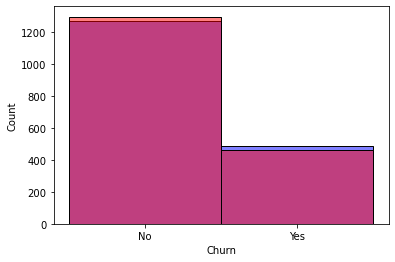

In [60]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [61]:
from sklearn import metrics
accuracy_1=metrics.accuracy_score(y_test,y_test_pred)
accuracy_1

0.7529812606473595

### Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [63]:
y_test_pred = classifier.predict(X_test_transformed)

In [64]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

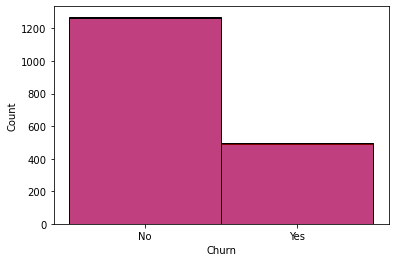

In [65]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [66]:
from sklearn import metrics
accuracy_2=metrics.accuracy_score(y_test,y_test_pred)
accuracy_2

0.7075525269733106

### Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [68]:
y_test_pred = classifier.predict(X_test_transformed)

In [69]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

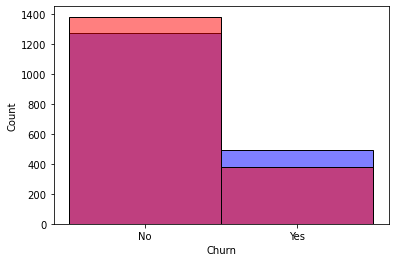

In [70]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [71]:
from sklearn import metrics
accuracy_3=metrics.accuracy_score(y_test,y_test_pred)
accuracy_3

0.7796706416808632

### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_transformed, y_train)

LogisticRegression(random_state=0)

In [73]:
y_test_pred = classifier.predict(X_test_transformed)

In [74]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

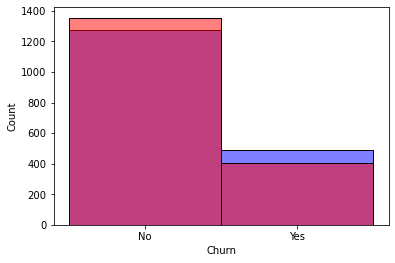

In [75]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [76]:
from sklearn import metrics
accuracy_4=metrics.accuracy_score(y_test,y_test_pred)
accuracy_4

0.7836456558773425

### Support Vector Machine

In [77]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

SVC()

In [78]:
y_test_pred = classifier.predict(X_test_transformed)

In [79]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

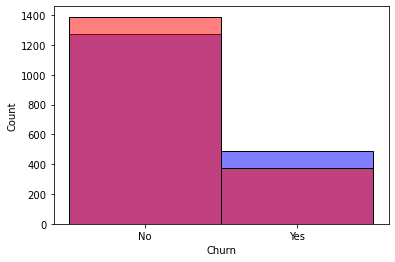

In [80]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [81]:
accuracy_5=metrics.accuracy_score(y_test,y_test_pred)
accuracy_5

0.7791027825099376

In [82]:
dict=pd.DataFrame({'Classifiers':['KNN_C','DecisionTree_C','RandomForest_C','LogisticRegression','SVC'],
                'values':[accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5]})
dict

,Classifiers,values
0,KNN_C,0.752981
1,DecisionTree_C,0.707553
2,RandomForest_C,0.779671
3,LogisticRegression,0.783646
4,SVC,0.779103


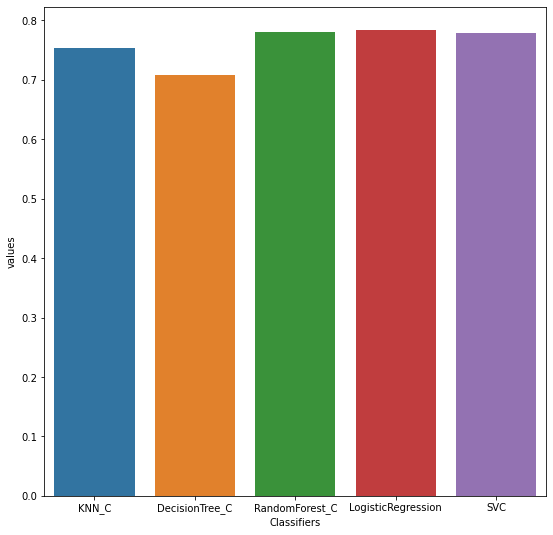

In [83]:
plt.figure(figsize=(9,9))
sns.barplot(x='Classifiers',y='values',data=dict)
plt.show()

`Conclusion`:LogisticRegression classifier is the best algorithm for accuracy prediction.